## Exercise 2: value 50%
En el ejemplo del Breast Cancer Wisconsin (diagnostic) Dataset, construir un script en Python para producir la gráfica de más abajo usando el atributo mean texture.


[5.12260029]
[[-0.23448037]]


Text(0, 0.5, 'Probability')

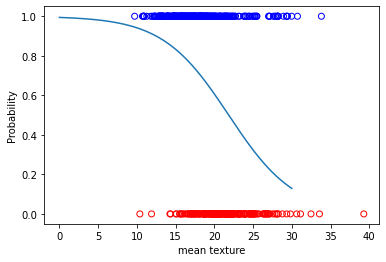

In [2]:
%matplotlib inline
from sklearn import linear_model
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()   # Load dataset
x = cancer.data[:,1]            # mean texture
y = cancer.target               # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'}    # 0: malignant, 1: benign

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
                y = y)

#---print trained model intercept---
print(log_regress.intercept_)     # [5.12260029]

#---print trained model coefficients---
print(log_regress.coef_)          # [[-0.23448037]]

def sigmoid(x):
    return (1 / (1 +
        np.exp(-(log_regress.intercept_[0] +
        (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x,y,
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
    cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean texture")
plt.ylabel("Probability")
